# Gutenberg Chapters Dataset with CNN-Kim
CNN-Kim analysis with the Gutenberg chapters dataset. Using the following configuration:
1. Using Learned Embedding
1. Embedding size: 100
1. Using chapter length of 2,500
1. Top vocabulary count 5,000
1. Using filter sizes of 3, 4, 5, 6
1. Adam Learning Rate of 1e-4
1. L2-contraint 0.001

In [1]:
%matplotlib inline

import os
import sys
ai_lit_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir))
print("Loading AI Lit system from path", ai_lit_path)
sys.path.append(ai_lit_path)

import tensorflow as tf

from ai_lit.analysis import analysis_util
from ai_lit.university.gutenberg import gb_chap_cnn_kim

Loading AI Lit system from path C:\Users\joewo\workspaces\python\ai_lit


C:\Tools\Anaconda3\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Validation Step
Targets:
[0 4 1 1 0 1 4 4 1 4 1 1 4 1 4 1 1 1 4 4]
Predictions:
[3 4 5 4 1 1 4 4 1 4 3 3 3 3 4 3 4 3 4 4]
Loss 1.28151, Acc 0.45

Testing examples exhausted
Shutting down all network threads
Accuracy: 0.613163265306
F1: 0.622899934842


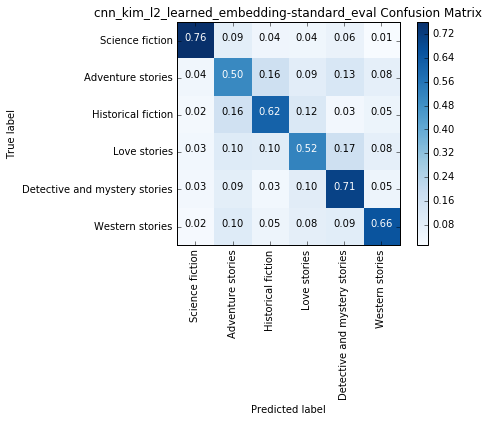

In [2]:
# use the flags imported from the univserity and the model to set the configuration
tf.flags.FLAGS.chapter_length = 2500
tf.flags.FLAGS.vocab_count = 5000
tf.flags.FLAGS.embedding_size=100
tf.flags.FLAGS.epochs=10

dataset_wkspc = os.path.join(ai_lit_path, 'workspace', 'gb_input')
training_wkspc = os.path.join(ai_lit_path, 'workspace', 'gutenberg_chapters')
model_name = 'cnn_kim_l2_learned_embedding'
evaluation_name = 'standard_eval'
univ = gb_chap_cnn_kim.GbChaptersCnnKimUniversity(model_name, training_wkspc, dataset_wkspc)
accuracy, f1, cm = analysis_util.train_and_evaluate(univ, model_name, evaluation_name)